<a href="https://colab.research.google.com/github/thiagomacielbarbosa/data-engineer-analytics/blob/main/Projeto_california_housing_test_GH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing Test/Machine Learn

In [1]:
!pip install pandas matplotlib seaborn scikit-learn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("✅ Bibliotecas instaladas e importadas com sucesso!")

✅ Bibliotecas instaladas e importadas com sucesso!


In [2]:
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print(f"✅ Arquivo '{file_name}' carregado com sucesso!")
print(f"📊 Dimensões do dataset: {df.shape}")

Saving california_housing_test.csv to california_housing_test.csv
✅ Arquivo 'california_housing_test.csv' carregado com sucesso!
📊 Dimensões do dataset: (3000, 9)


In [3]:
print("🔍 PRIMEIRAS LINHAS DO DATASET:")
display(df.head())

print("\n📋 INFORMAÇÕES SOBRE AS COLUNAS:")
df.info()

print("\n📈 ESTATÍSTICAS DESCRITIVAS:")
display(df.describe())

print("\n🎯 VERIFICAÇÃO DE VALORES NULOS:")
print(df.isnull().sum())

🔍 PRIMEIRAS LINHAS DO DATASET:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0



📋 INFORMAÇÕES SOBRE AS COLUNAS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB

📈 ESTATÍSTICAS DESCRITIVAS:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000



🎯 VERIFICAÇÃO DE VALORES NULOS:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [4]:
df_clean = df.copy()

if df_clean.isnull().sum().sum() > 0:
    print("🔄 Tratando valores nulos...")



    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())
else:
    print("✅ Não há valores nulos no dataset!")

print(f"📊 Dataset limpo: {df_clean.shape}")

✅ Não há valores nulos no dataset!
📊 Dataset limpo: (3000, 9)


📊 DISTRIBUIÇÃO DAS VARIÁVEIS NUMÉRICAS:


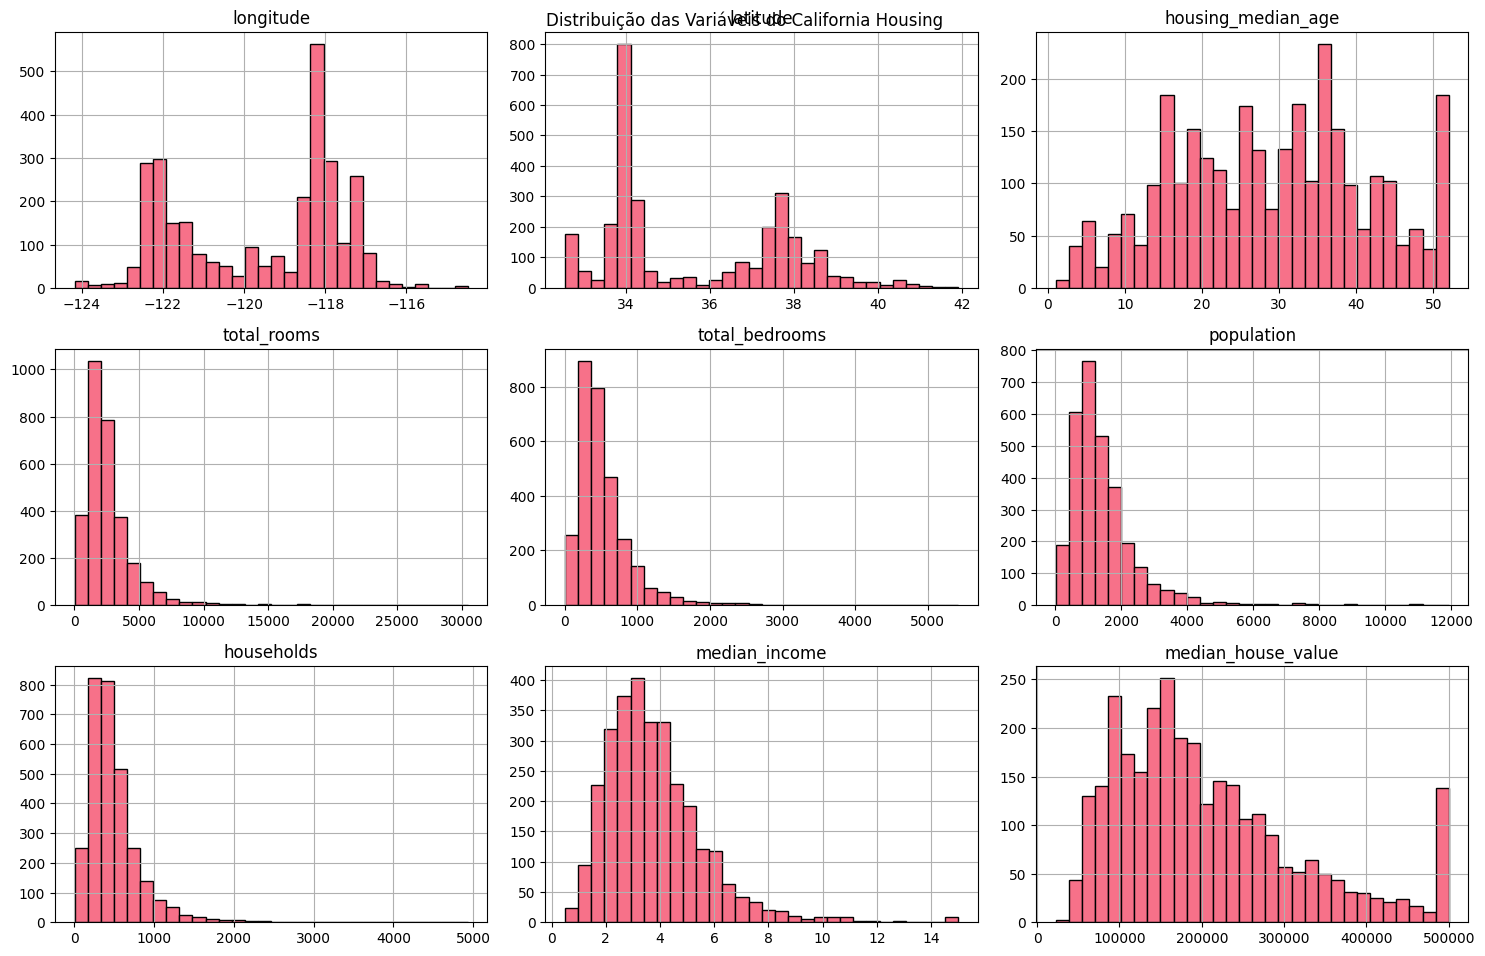

In [5]:
print("📊 DISTRIBUIÇÃO DAS VARIÁVEIS NUMÉRICAS:")

# Histogramas de todas as variáveis numéricas
df_clean.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribuição das Variáveis do California Housing', y=0.95)
plt.tight_layout()
plt.show()

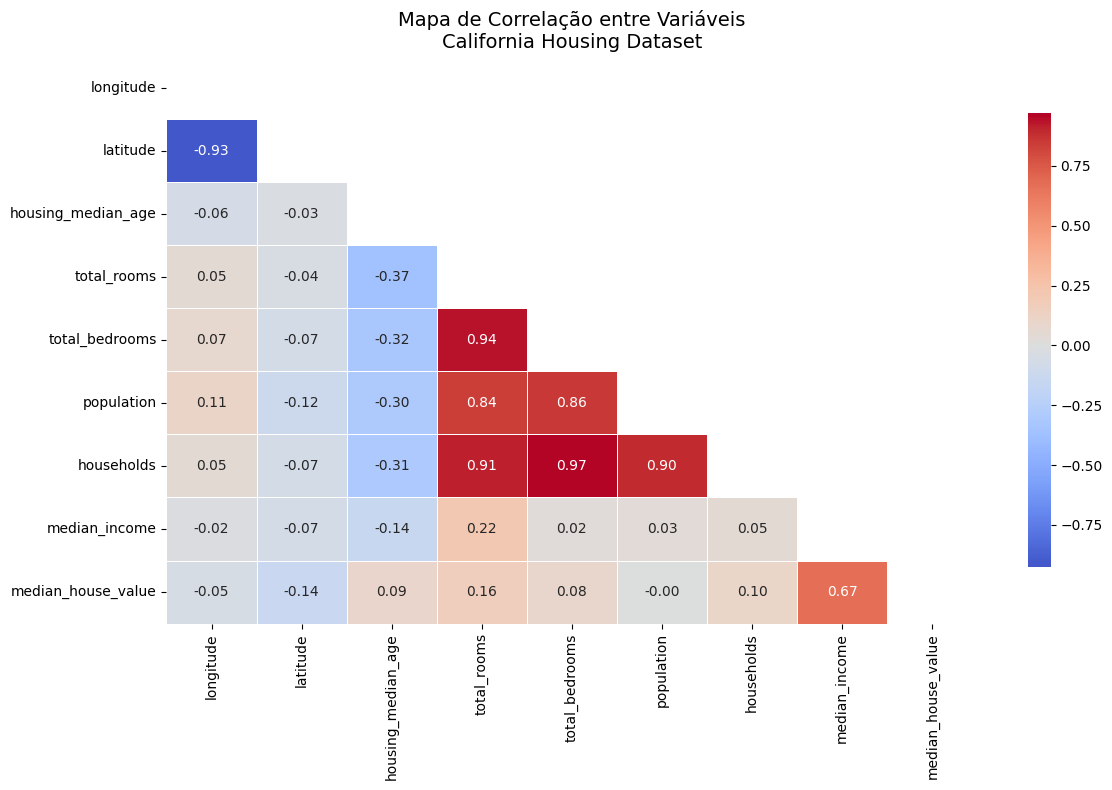

In [6]:
# Mapa de calor de correlações
plt.figure(figsize=(12, 8))
correlation_matrix = df_clean.corr()

# Cria máscara para o triângulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
            center=0, fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Mapa de Correlação entre Variáveis\nCalifornia Housing Dataset', fontsize=14)
plt.tight_layout()
plt.show()

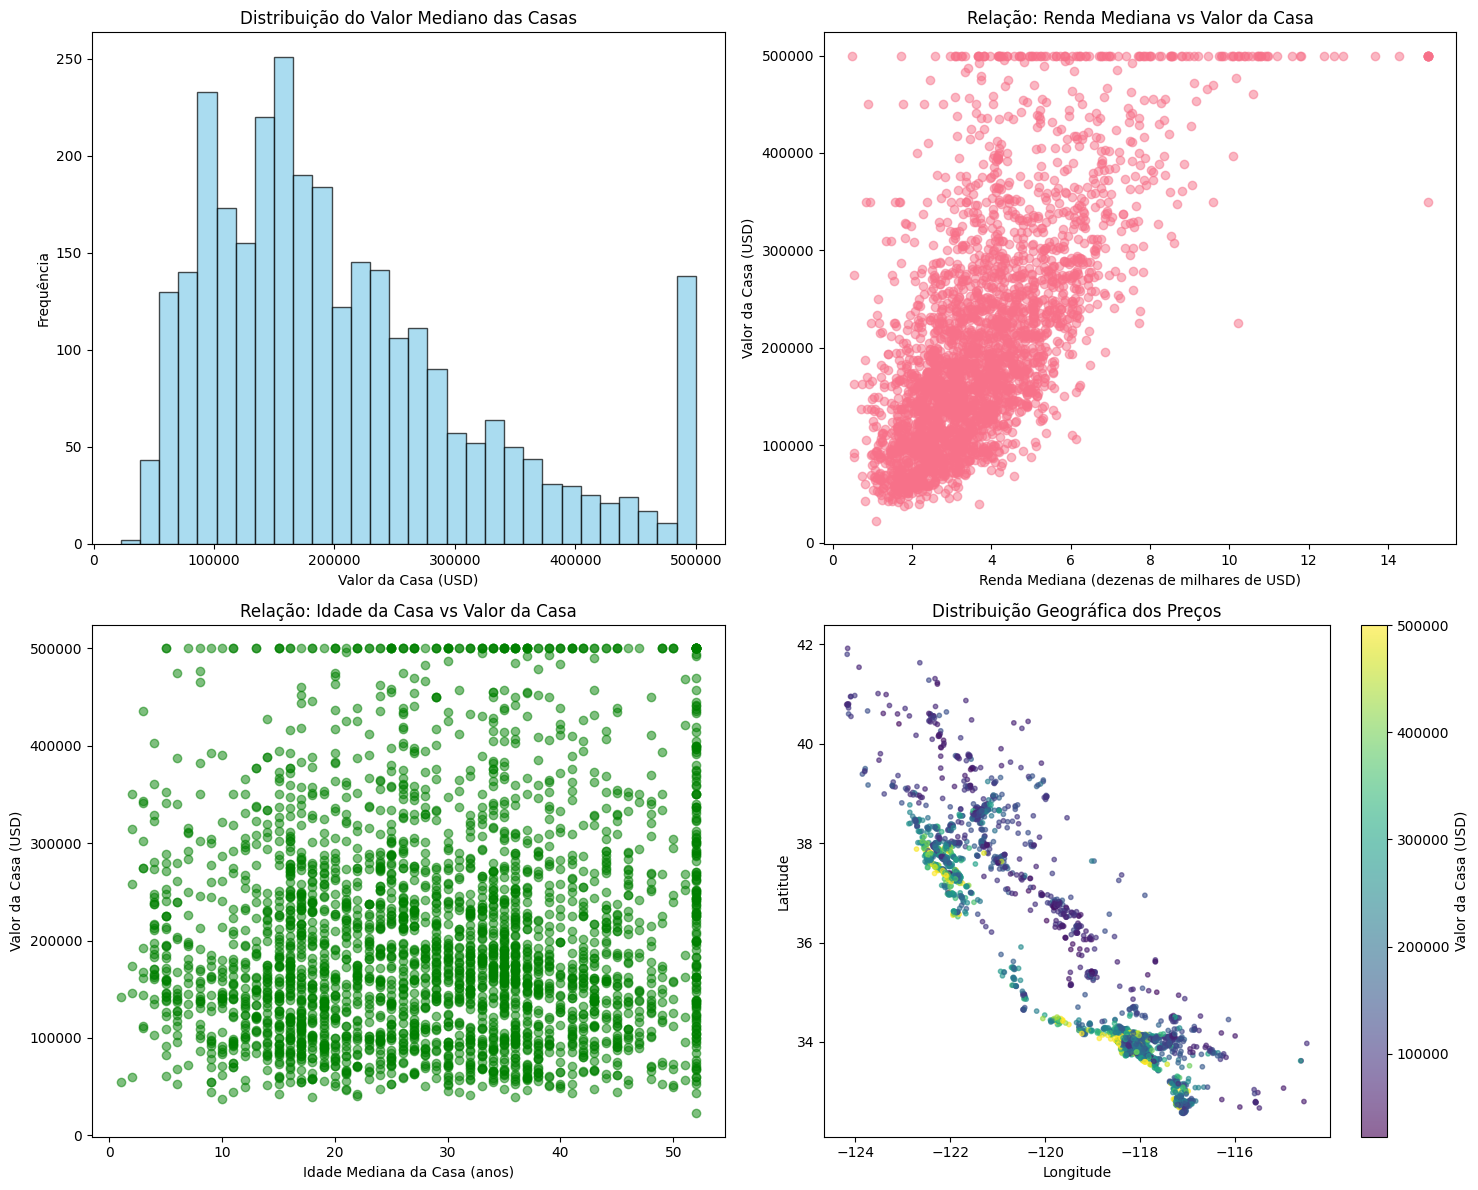

In [7]:
# Configura subplots para análise detalhada
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribuição do preço mediano das casas
axes[0,0].hist(df_clean['median_house_value'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribuição do Valor Mediano das Casas')
axes[0,0].set_xlabel('Valor da Casa (USD)')
axes[0,0].set_ylabel('Frequência')

# 2. Renda mediana vs Valor da casa
axes[0,1].scatter(df_clean['median_income'], df_clean['median_house_value'], alpha=0.5)
axes[0,1].set_title('Relação: Renda Mediana vs Valor da Casa')
axes[0,1].set_xlabel('Renda Mediana (dezenas de milhares de USD)')
axes[0,1].set_ylabel('Valor da Casa (USD)')

# 3. Idade da casa vs Valor da casa
axes[1,0].scatter(df_clean['housing_median_age'], df_clean['median_house_value'], alpha=0.5, color='green')
axes[1,0].set_title('Relação: Idade da Casa vs Valor da Casa')
axes[1,0].set_xlabel('Idade Mediana da Casa (anos)')
axes[1,0].set_ylabel('Valor da Casa (USD)')

# 4. Mapa de densidade de preços por localização
scatter = axes[1,1].scatter(df_clean['longitude'], df_clean['latitude'],
                           c=df_clean['median_house_value'], cmap='viridis',
                           alpha=0.6, s=10)
plt.colorbar(scatter, ax=axes[1,1], label='Valor da Casa (USD)')
axes[1,1].set_title('Distribuição Geográfica dos Preços')
axes[1,1].set_xlabel('Longitude')
axes[1,1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

# Pergunta 1: Qual é a distribuição dos preços das casas e como isso impacta o mercado?

In [8]:
print("💰 RESPOSTA 1 - ANÁLISE DA DISTRIBUIÇÃO DE PREÇOS:")

price_stats = df_clean['median_house_value'].describe()
print(f"• Preço médio: ${price_stats['mean']:,.2f}")
print(f"• Preço mediano: ${price_stats['50%']:,.2f}")
print(f"• Faixa de preços: ${price_stats['min']:,.2f} - ${price_stats['max']:,.2f}")
print(f"• Desvio padrão: ${price_stats['std']:,.2f} (indicador de volatilidade)")

# Análise de segmentação por faixa de preço
price_quartiles = np.percentile(df_clean['median_house_value'], [25, 50, 75])
print(f"\n🎯 Segmentação por Quartis:")
print(f"• 25% mais baratas: até ${price_quartiles[0]:,.2f}")
print(f"• Faixa intermediária: ${price_quartiles[0]:,.2f} - ${price_quartiles[2]:,.2f}")
print(f"• 25% mais caras: acima de ${price_quartiles[2]:,.2f}")

💰 RESPOSTA 1 - ANÁLISE DA DISTRIBUIÇÃO DE PREÇOS:
• Preço médio: $205,846.27
• Preço mediano: $177,650.00
• Faixa de preços: $22,500.00 - $500,001.00
• Desvio padrão: $113,119.69 (indicador de volatilidade)

🎯 Segmentação por Quartis:
• 25% mais baratas: até $121,200.00
• Faixa intermediária: $121,200.00 - $263,975.00
• 25% mais caras: acima de $263,975.00


# Pergunta 2: Como a renda mediana se correlaciona com o valor das casas?

In [9]:
print("\n📈 RESPOSTA 2 - CORRELAÇÃO RENDA×VALOR DA CASA:")

correlation_income_price = df_clean['median_income'].corr(df_clean['median_house_value'])
print(f"• Correlação: {correlation_income_price:.3f}")

if correlation_income_price > 0.7:
    print("✅ Forte correlação positiva - a renda é um bom preditor do valor da casa")
elif correlation_income_price > 0.3:
    print("📊 Correlação moderada - a renda influencia, mas há outros fatores importantes")
else:
    print("🔍 Correlação fraca - outros fatores podem ser mais determinantes")

# Análise de renda por faixa
income_stats = df_clean['median_income'].describe()
print(f"\n💵 Análise da Renda Mediana:")
print(f"• Média: {income_stats['mean']:.2f} (dezenas de milhares de USD)")
print(f"• Mediana: {income_stats['50%']:.2f}")
print(f"• Variação: {income_stats['min']:.2f} - {income_stats['max']:.2f}")


📈 RESPOSTA 2 - CORRELAÇÃO RENDA×VALOR DA CASA:
• Correlação: 0.673
📊 Correlação moderada - a renda influencia, mas há outros fatores importantes

💵 Análise da Renda Mediana:
• Média: 3.81 (dezenas de milhares de USD)
• Mediana: 3.49
• Variação: 0.50 - 15.00


# Pergunta 3: Qual é o impacto da localização geográfica nos preços?

In [10]:
print("\n🗺️ RESPOSTA 3 - ANÁLISE GEOGRÁFICA DOS PREÇOS:")

# Análise por coordenadas geográficas
coastal_areas = df_clean[df_clean['longitude'] < -118]  # Aproximadamente áreas costeiras
inland_areas = df_clean[df_clean['longitude'] >= -118]

coastal_avg_price = coastal_areas['median_house_value'].mean()
inland_avg_price = inland_areas['median_house_value'].mean()

print(f"🏖️  Preço médio em áreas costeiras: ${coastal_avg_price:,.2f}")
print(f"🌳 Preço médio em áreas interioranas: ${inland_avg_price:,.2f}")
print(f"💰 Diferença: ${(coastal_avg_price - inland_avg_price):,.2f}")

price_difference_pct = ((coastal_avg_price - inland_avg_price) / inland_avg_price) * 100
print(f"📊 As áreas costeiras são {price_difference_pct:.1f}% mais caras")


🗺️ RESPOSTA 3 - ANÁLISE GEOGRÁFICA DOS PREÇOS:
🏖️  Preço médio em áreas costeiras: $210,253.15
🌳 Preço médio em áreas interioranas: $192,117.86
💰 Diferença: $18,135.29
📊 As áreas costeiras são 9.4% mais caras


# Pergunta 4: Como as características das propriedades influenciam seu valor?

In [11]:
print("\n🏠 RESPOSTA 4 - ANÁLISE DAS CARACTERÍSTICAS DAS PROPRIEDADES:")

# Correlações com as principais características
features_to_analyze = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

print("🔗 Correlações com o valor da casa:")
for feature in features_to_analyze:
    if feature in df_clean.columns:
        corr = df_clean[feature].corr(df_clean['median_house_value'])
        print(f"• {feature}: {corr:.3f}")

# Análise de idade das casas
age_analysis = df_clean['housing_median_age'].describe()
print(f"\n🏚️  Análise da Idade das Casas:")
print(f"• Idade média: {age_analysis['mean']:.1f} anos")
print(f"• Casa mais nova: {age_analysis['min']:.0f} anos")
print(f"• Casa mais antiga: {age_analysis['max']:.0f} anos")


🏠 RESPOSTA 4 - ANÁLISE DAS CARACTERÍSTICAS DAS PROPRIEDADES:
🔗 Correlações com o valor da casa:
• housing_median_age: 0.091
• total_rooms: 0.160
• total_bedrooms: 0.082
• population: -0.001
• households: 0.100
• median_income: 0.673

🏚️  Análise da Idade das Casas:
• Idade média: 28.8 anos
• Casa mais nova: 1 anos
• Casa mais antiga: 52 anos


# Pergunta 5: Existem outliers que podem distorcer a análise?

In [12]:
print("\n📊 RESPOSTA 5 - DETECÇÃO E ANÁLISE DE OUTLIERS:")

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Detecta outliers na variável principal
outliers_count, lower_b, upper_b = detect_outliers_iqr(df_clean['median_house_value'])
total_samples = len(df_clean)

print(f"🎯 Análise de Outliers no Valor das Casas:")
print(f"• Total de outliers detectados: {outliers_count}")
print(f"• Percentual: {(outliers_count/total_samples)*100:.1f}%")
print(f"• Limite inferior: ${lower_b:,.2f}")
print(f"• Limite superior: ${upper_b:,.2f}")

if outliers_count > 0:
    print("💡 Estes outliers podem representar propriedades de luxo ou situações atípicas")


📊 RESPOSTA 5 - DETECÇÃO E ANÁLISE DE OUTLIERS:
🎯 Análise de Outliers no Valor das Casas:
• Total de outliers detectados: 141
• Percentual: 4.7%
• Limite inferior: $-92,962.50
• Limite superior: $478,137.50
💡 Estes outliers podem representar propriedades de luxo ou situações atípicas


# Pergunta 6: Qual é a relação entre densidade populacional e preços?

In [13]:
print("\n👥 RESPOSTA 6 - ANÁLISE DE DENSIDADE POPULACIONAL:")

# Cria feature de densidade (população por household)
df_clean['population_per_household'] = df_clean['population'] / df_clean['households']

# Análise de correlação
density_correlation = df_clean['population_per_household'].corr(df_clean['median_house_value'])

print(f"📈 Correlação densidade×preço: {density_correlation:.3f}")

# Segmentação por densidade
low_density = df_clean[df_clean['population_per_household'] < 2]
medium_density = df_clean[(df_clean['population_per_household'] >= 2) & (df_clean['population_per_household'] <= 4)]
high_density = df_clean[df_clean['population_per_household'] > 4]

print(f"\n🏘️  Preços médios por densidade:")
print(f"• Baixa densidade (<2): ${low_density['median_house_value'].mean():,.2f}")
print(f"• Média densidade (2-4): ${medium_density['median_house_value'].mean():,.2f}")
print(f"• Alta densidade (>4): ${high_density['median_house_value'].mean():,.2f}")


👥 RESPOSTA 6 - ANÁLISE DE DENSIDADE POPULACIONAL:
📈 Correlação densidade×preço: -0.045

🏘️  Preços médios por densidade:
• Baixa densidade (<2): $273,589.35
• Média densidade (2-4): $205,657.34
• Alta densidade (>4): $147,667.19


# Pergunta 7: Quais insights podem orientar decisões de investimento?

In [14]:
print("\n💼 RESPOSTA 7 - INSIGHTS PARA TOMADA DE DECISÃO:")

# Identifica as áreas com melhor custo-benefício
df_clean['price_to_income_ratio'] = df_clean['median_house_value'] / (df_clean['median_income'] * 10000)

# Encontra oportunidades (preço baixo em relação à renda)
opportunities = df_clean[df_clean['price_to_income_ratio'] < df_clean['price_to_income_ratio'].quantile(0.25)]

print("🎯 Áreas com potencial de valorização (menor relação preço/renda):")
print(f"• Número de propriedades: {len(opportunities)}")
print(f"• Preço médio: ${opportunities['median_house_value'].mean():,.2f}")
print(f"• Renda média: {opportunities['median_income'].mean():.2f}")
print(f"• Relação preço/renda média: {opportunities['price_to_income_ratio'].mean():.2f}")

print("\n📈 Recomendações Estratégicas:")
recommendations = [
    "Focar em áreas com alta renda e preços moderados",
    "Considerar propriedades mais antigas para renovação",
    "Avaliar oportunidades em regiões em processo de valorização",
    "Diversificar entre áreas costeiras e interioranas"
]

for i, rec in enumerate(recommendations, 1):
    print(f"  {i}. {rec}")


💼 RESPOSTA 7 - INSIGHTS PARA TOMADA DE DECISÃO:
🎯 Áreas com potencial de valorização (menor relação preço/renda):
• Número de propriedades: 750
• Preço médio: $120,538.95
• Renda média: 3.82
• Relação preço/renda média: 3.13

📈 Recomendações Estratégicas:
  1. Focar em áreas com alta renda e preços moderados
  2. Considerar propriedades mais antigas para renovação
  3. Avaliar oportunidades em regiões em processo de valorização
  4. Diversificar entre áreas costeiras e interioranas


In [15]:
# Salva o dataset processado
df_clean.to_csv('california_housing_analysis_clean.csv', index=False)

# Gera relatório de insights
with open('relatorio_analise_california_housing.txt', 'w', encoding='utf-8') as f:
    f.write("RELATÓRIO DE ANÁLISE - CALIFORNIA HOUSING DATASET\n")
    f.write("=" * 60 + "\n\n")
    f.write("📊 RESUMO EXECUTIVO:\n")
    f.write(f"• Dataset analisado: {file_name}\n")
    f.write(f"• Total de propriedades: {len(df_clean):,}\n")
    f.write(f"• Período de análise: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}\n")
    f.write(f"• Preço médio das casas: ${df_clean['median_house_value'].mean():,.2f}\n\n")

    f.write("🎯 PRINCIPAIS DESCOBERTAS:\n")
    f.write(f"1. Correlação renda×preço: {correlation_income_price:.3f}\n")
    f.write(f"2. Diferença costeira/interior: ${(coastal_avg_price - inland_avg_price):,.2f}\n")
    f.write(f"3. Outliers identificados: {outliers_count}\n")
    f.write(f"4. Oportunidades de investimento: {len(opportunities)} propriedades\n\n")

    f.write("💡 RECOMENDAÇÕES:\n")
    f.write("• Priorizar áreas com alta renda e preços moderados\n")
    f.write("• Considerar densidade populacional na análise\n")
    f.write("• Avaliar propriedades com bom custo-benefício\n")

print("✅ Projeto concluído! Arquivos salvos:")
print("   - california_housing_analysis_clean.csv")
print("   - relatorio_analise_california_housing.txt")

✅ Projeto concluído! Arquivos salvos:
   - california_housing_analysis_clean.csv
   - relatorio_analise_california_housing.txt
